In [1]:
pwd

'C:\\Users\\Jian Wang\\Desktop\\py\\Kaggle-Comp\\tmdb'

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0212-CE0A

 Directory of C:\Users\Jian Wang\Desktop\py\Kaggle-Comp\tmdb

2019/04/23  17:32    <DIR>          .
2019/04/23  17:32    <DIR>          ..
2019/04/23  10:25    <DIR>          .ipynb_checkpoints
2019/04/23  11:45            13,913 columns.png
2019/04/23  10:24    <DIR>          input
2019/04/15  09:26             2,233 tmdb.py
2019/04/23  10:48            80,534 tmdb过程.docx
2019/04/23  17:32           122,615 Untitled.ipynb
               4 File(s)        219,295 bytes
               4 Dir(s)  51,262,144,512 bytes free


In [3]:
ls input

 Volume in drive C is Windows
 Volume Serial Number is 0212-CE0A

 Directory of C:\Users\Jian Wang\Desktop\py\Kaggle-Comp\tmdb\input

2019/04/23  10:24    <DIR>          .
2019/04/23  10:24    <DIR>          ..
2019/02/06  23:32            61,585 sample_submission.csv
2019/02/06  23:32        41,868,556 test.csv
2019/02/06  23:32        28,311,747 train.csv
               3 File(s)     70,241,888 bytes
               2 Dir(s)  51,262,144,512 bytes free


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
train = pd.read_csv('input/train.csv')

In [6]:
test = pd.read_csv('input/test.csv')

In [7]:
sample = pd.read_csv('input/sample_submission.csv')

In [8]:
train.shape

(3000, 23)

In [9]:
test.shape

(4398, 22)

In [10]:
sample.shape

(4398, 2)

In [11]:
train.dtypes.sort_values()

id                         int64
budget                     int64
revenue                    int64
popularity               float64
runtime                  float64
genres                    object
cast                      object
Keywords                  object
title                     object
tagline                   object
status                    object
spoken_languages          object
release_date              object
production_countries      object
crew                      object
poster_path               object
overview                  object
original_title            object
original_language         object
imdb_id                   object
homepage                  object
belongs_to_collection     object
production_companies      object
dtype: object

In [12]:
train.select_dtypes(include='int64').head()

,id,budget,revenue
0,1,14000000,12314651
1,2,40000000,95149435
2,3,3300000,13092000
3,4,1200000,16000000
4,5,0,3923970


In [13]:
train.select_dtypes(include='float64').head()

,popularity,runtime
0,6.575393,93.0
1,8.248895,113.0
2,64.299990,105.0
3,3.174936,122.0
4,1.148070,118.0


In [14]:
train.select_dtypes(include='object').head()

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [15]:
train.isnull().sum()[train.isnull().sum()>0]

belongs_to_collection    2396
genres                      7
homepage                 2054
overview                    8
poster_path                 1
production_companies      156
production_countries       55
runtime                     2
spoken_languages           20
tagline                   597
Keywords                  276
cast                       13
crew                       16
dtype: int64

In [16]:
train.belongs_to_collection = train.belongs_to_collection.fillna("unknow")
test.belongs_to_collection = test.belongs_to_collection.fillna("unknow")

In [17]:
train.genres = train.genres.fillna("unknow")
test.genres = test.genres.fillna("unknow")

In [18]:
train.homepage = train.homepage.fillna("unknow")
test.homepage = test.homepage.fillna("unknow")

In [19]:
train.overview = train.overview.fillna("unknow")
test.overview = test.overview.fillna("unknow")

In [20]:
train.poster_path = train.poster_path.fillna("unknow")
test.poster_path = test.poster_path.fillna("unknow")

In [21]:
train.production_companies = train.production_companies.fillna("unknow")
test.production_companies = test.production_companies.fillna("unknow")

In [22]:
train.production_countries = train.production_countries.fillna("unknow")
test.production_countries = test.production_countries.fillna("unknow")

In [23]:
train.runtime = train.runtime.fillna(train.runtime.mean())
test.runtime = test.runtime.fillna(train.runtime.mean())

In [32]:
train.spoken_languages = train.spoken_languages.fillna("unknow")
test.spoken_languages = test.spoken_languages.fillna("unknow")

In [25]:
train.tagline = train.tagline.fillna("unknow")
test.tagline = test.tagline.fillna("unknow")

In [26]:
train.Keywords = train.Keywords.fillna("unknow")
test.Keywords = test.Keywords.fillna("unknow")

In [27]:
train.cast = train.cast.fillna("unknow")
test.cast = test.cast.fillna("unknow")

In [28]:
train.crew = train.crew.fillna("unknow")
test.crew = test.crew.fillna("unknow")

In [29]:
warnings.filterwarnings(action="ignore")

In [31]:
"""plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
sns.barplot('popularity', 'revenue', data=train)
plt.subplot(3, 3, 3)
sns.barplot('runtime', 'revenue', data=train)
plt.subplot(3, 3, 4)
sns.barplot('genres', 'revenue', data=train)
plt.subplot(3, 3, 5)
sns.barplot('cast', 'revenue', data=train)
plt.subplot(3, 3, 6)
sns.barplot('Keywords', 'revenue', data=train)
plt.subplot(3, 3, 7)
sns.barplot('title', 'revenue', data=train)
plt.subplot(3, 3, 8)
sns.barplot('tagline', 'revenue', data=train)
plt.subplot(3, 3, 9)
sns.barplot('status', 'revenue', data=train)"""

"plt.figure(figsize=[12, 12])\nplt.subplot(3, 3, 1)\nsns.barplot('budget', 'revenue', data=train)\nplt.subplot(3, 3, 2)\nsns.barplot('popularity', 'revenue', data=train)\nplt.subplot(3, 3, 3)\nsns.barplot('runtime', 'revenue', data=train)\nplt.subplot(3, 3, 4)\nsns.barplot('genres', 'revenue', data=train)\nplt.subplot(3, 3, 5)\nsns.barplot('cast', 'revenue', data=train)\nplt.subplot(3, 3, 6)\nsns.barplot('Keywords', 'revenue', data=train)\nplt.subplot(3, 3, 7)\nsns.barplot('title', 'revenue', data=train)\nplt.subplot(3, 3, 8)\nsns.barplot('tagline', 'revenue', data=train)\nplt.subplot(3, 3, 9)\nsns.barplot('status', 'revenue', data=train)"

In [ ]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
#sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
plt.subplot(3, 3, 3)
plt.subplot(3, 3, 4)
plt.subplot(3, 3, 5)
plt.subplot(3, 3, 6)
plt.subplot(3, 3, 7)
plt.subplot(3, 3, 8)
plt.subplot(3, 3, 9)

In [ ]:
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 1)
#sns.barplot('budget', 'revenue', data=train)
plt.subplot(3, 3, 2)
plt.subplot(3, 3, 3)

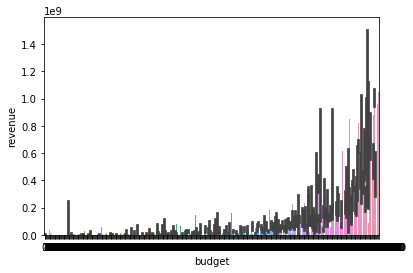

In [33]:
sns.barplot('budget', 'revenue', data=train)

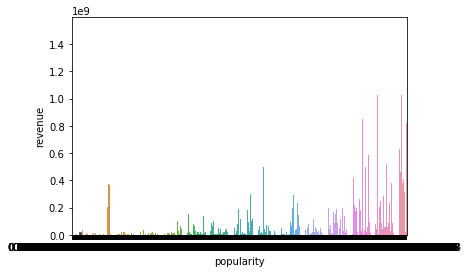

In [35]:
sns.barplot('popularity', 'revenue', data=train)

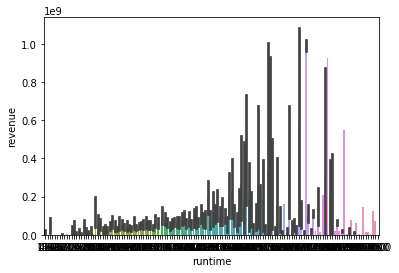

In [36]:
sns.barplot('runtime', 'revenue', data=train)

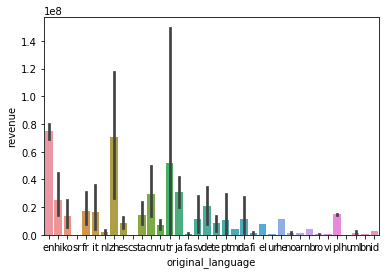

In [37]:
sns.barplot('original_language', 'revenue', data=train)

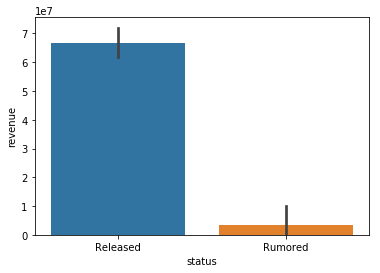

In [38]:
sns.barplot('status', 'revenue', data=train)

In [43]:
train['tagline2'] = train.tagline.apply(lambda x: len(x))

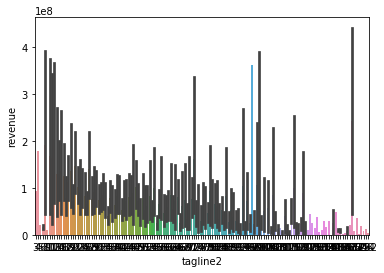

In [45]:
sns.barplot('tagline2', 'revenue', data=train)

In [59]:
train.spoken_languages[3].split(':')

["[{'iso_639_1'",
 " 'en', 'name'",
 " 'English'}, {'iso_639_1'",
 " 'hi', 'name'",
 " 'हिन्दी'}]"]

In [74]:
train.spoken_languages[3].split(':')[0].strip('[' + '{' + "'")

'iso_639_1'

In [83]:
train.spoken_languages[0].split(':')[1].split(',')[0].strip(" "+"'"+"'")

'en'

In [136]:
train['spoken_languages2']= train.spoken_languages.apply(lambda x: x.split(':')[0].strip('[' + '{' + "'"))

In [87]:
train.spoken_languages2.value_counts()

iso_639_1    2980
unknow         20
Name: spoken_languages, dtype: int64

In [95]:
train.spoken_languages[3]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]"

In [97]:
len(train.spoken_languages[3])

79

In [139]:
train['spoken_languages2'] = train.spoken_languages.apply(lambda x: len(x)//50)

In [125]:
train.spoken_languages2.value_counts()

0    2125
1     549
2     218
3      80
4      19
5       6
6       2
7       1
Name: spoken_languages, dtype: int64

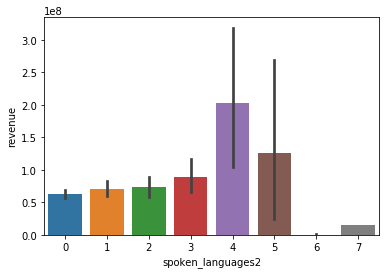

In [140]:
sns.barplot('spoken_languages2', 'revenue', data=train)

In [367]:
train['spoken_languages2'] = train.spoken_languages.apply(lambda x: x.count('name'))

In [368]:
train['spoken_languages2'].value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages2, dtype: int64

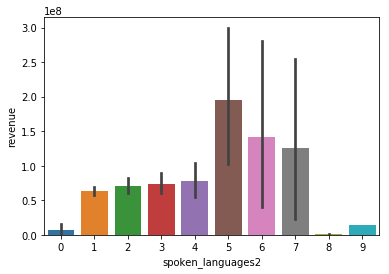

In [369]:
sns.barplot('spoken_languages2', 'revenue', data=train)

In [141]:
train.release_date

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
5         8/6/87
6        8/30/12
7        1/15/04
8        2/16/96
9        4/16/03
10      11/21/76
11       7/10/87
12       9/15/99
13        3/4/05
14       6/20/02
15       10/6/10
16        8/4/05
17      12/25/13
18        2/2/11
19        8/2/05
20        4/3/98
21       8/13/82
22       7/28/12
23        9/2/11
24        9/9/06
25      10/23/92
26        9/8/97
27        9/7/13
28        8/8/86
29        4/7/02
          ...   
2970    11/25/92
2971    10/12/90
2972     7/27/06
2973      8/9/85
2974     1/28/05
2975     7/31/09
2976      3/3/00
2977     5/15/01
2978    10/23/98
2979     4/23/10
2980      2/4/16
2981      9/9/16
2982     9/12/12
2983      4/4/97
2984      8/8/03
2985     2/17/06
2986      9/3/04
2987     1/20/89
2988     5/20/02
2989     5/11/01
2990     3/28/97
2991     1/12/01
2992     3/18/24
2993     6/17/04
2994     9/18/92
2995     4/22/94
2996     3/28/13
2997    10/11/

In [148]:
pd.to_datetime(train.release_date[0])

Timestamp('2015-02-20 00:00:00')

In [150]:
type(pd.to_datetime(train.release_date[0]))

pandas._libs.tslibs.timestamps.Timestamp

In [151]:
t = pd.to_datetime(train.release_date[0])

In [152]:
t

Timestamp('2015-02-20 00:00:00')

In [155]:
t.year

2015

In [156]:
pd.to_datetime(train.release_date[0]).year

2015

In [158]:
pd.to_datetime(train.release_date[0]).month

2

In [159]:
pd.to_datetime(train.release_date[0]).day

20

In [161]:
pd.to_datetime(train.release_date[0]).weekday()

4

In [354]:
train['release_date_year'] = train.release_date.apply(lambda x: pd.to_datetime(x).year)

In [355]:
train['release_date_month'] = train.release_date.apply(lambda x: pd.to_datetime(x).month)

In [356]:
train['release_date_day'] = train.release_date.apply(lambda x: pd.to_datetime(x).day)

In [357]:
train['release_date_weekday'] = train.release_date.apply(lambda x: pd.to_datetime(x).weekday())

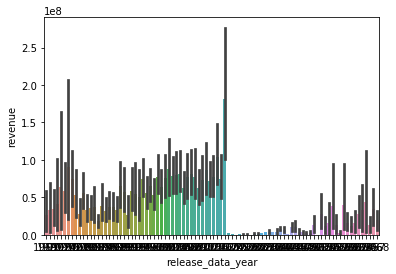

In [181]:
sns.barplot('release_date_year', 'revenue', data=train)

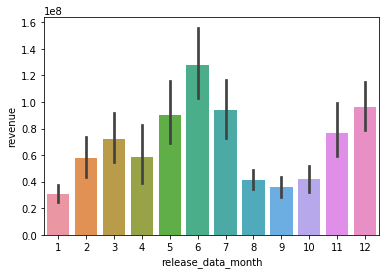

In [182]:
sns.barplot('release_date_month', 'revenue', data=train)

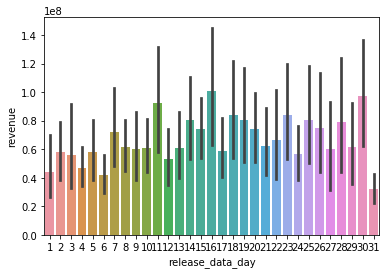

In [183]:
sns.barplot('release_date_day', 'revenue', data=train)

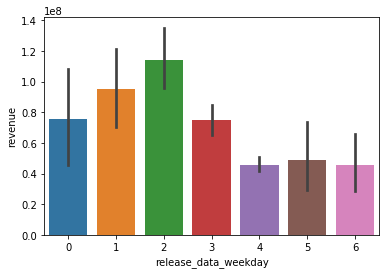

In [184]:
sns.barplot('release_date_weekday', 'revenue', data=train)

In [187]:
train.production_countries.value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                                                                                                                                      1752
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                                                                                       118
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                                                                                                                                                                  94
[{'iso_3166_1': 'IN', 'name': 'India'}]                                                                                  

In [196]:
train.production_countries[0].split(',')[0].split(':')[1].strip(" '" + "'" )

'US'

In [197]:
print(train.production_countries[0].split(',')[0].split(':')[1].strip(" '" + "'" ))

US


In [212]:
train['production_countries2'] = train.production_countries.apply(lambda x: x.split(',')[0].split(':')[1].strip(" '" + "'" ) if len(x) > 6 else x)

In [214]:
train['production_countries2'].value_counts()

US        1818
GB         234
FR         147
CA          97
DE          90
IN          78
unknow      55
AU          52
JP          50
RU          47
IT          36
CN          34
ES          33
HK          20
KR          19
MX          19
IE          17
BE          14
NZ          13
BR          12
DK          11
CZ          10
SE           8
NL           6
HU           6
AT           6
AE           5
GR           5
FI           4
IR           4
          ... 
CL           3
ZA           3
NO           3
UA           2
LU           2
KH           2
AR           2
TR           2
BS           2
BG           2
IL           2
PH           2
CH           2
NA           1
MN           1
SG           1
BA           1
RS           1
QA           1
SA           1
PK           1
MR           1
IS           1
MT           1
TW           1
UY           1
PL           1
ET           1
ID           1
BF           1
Name: production_countries2, Length: 61, dtype: int64

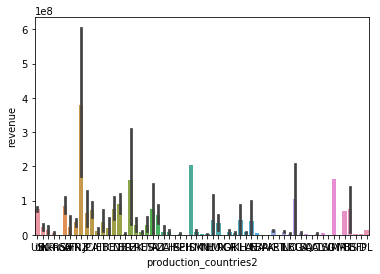

In [215]:
sns.barplot('production_countries2', 'revenue', data=train)

In [232]:
train.crew[0].count('id')

144

In [239]:
train['crew2'] = train.crew.apply(lambda x: x.count('id'))

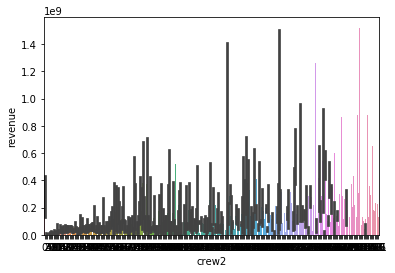

In [240]:
sns.barplot('crew2', 'revenue', data=train)

In [252]:
train['overview2'] = train.overview.apply(lambda x: len(x))

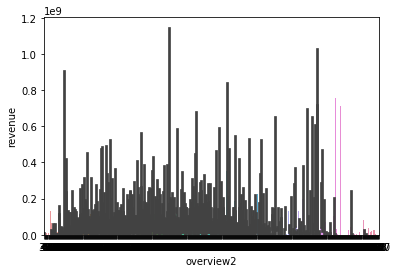

In [254]:
sns.barplot('overview2','revenue', data=train)

In [258]:
train['original_title2'] = train.original_title.apply(lambda x: len(x))

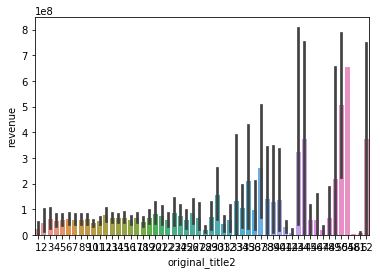

In [260]:
sns.barplot('original_title2', 'revenue', data=train)

In [263]:
train['homepage2'] = train.homepage.apply(lambda x: 0 if x=='unknow' else 1)

In [266]:
train.homepage2.value_counts()

0    2054
1     946
Name: homepage2, dtype: int64

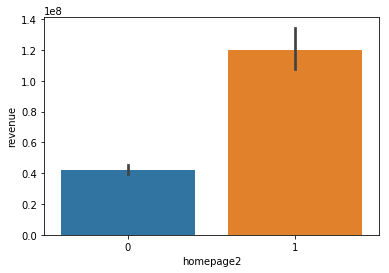

In [268]:
sns.barplot('homepage2', 'revenue', data=train)

In [273]:
train['belongs_to_collection2'] = train.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)

In [275]:
train['belongs_to_collection2'].value_counts()

0    2396
1     604
Name: belongs_to_collection2, dtype: int64

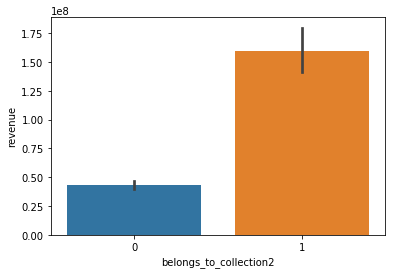

In [276]:
sns.barplot('belongs_to_collection2', 'revenue', data=train)

In [279]:
train.production_companies[0].count('id')

3

In [281]:
train['production_companies2'] = train.production_companies.apply(lambda x: x.count('id'))

In [283]:
train['production_companies2'].value_counts()

1     769
2     713
3     572
4     328
5     173
0     156
6     118
7      69
8      42
9      31
10     10
11      8
12      4
15      2
14      2
16      2
18      1
Name: production_companies2, dtype: int64

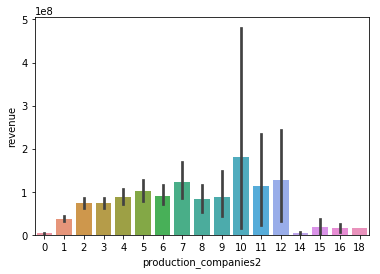

In [284]:
sns.barplot('production_companies2', 'revenue', data=train)

In [286]:
train['original_title3'] = train.original_title.apply(lambda x: 0 if x=='unknow' else 1)

In [288]:
train['original_title3'] .value_counts()

1    3000
Name: original_title3, dtype: int64

In [290]:
train['title2'] = train.title.apply(lambda x: len(x))

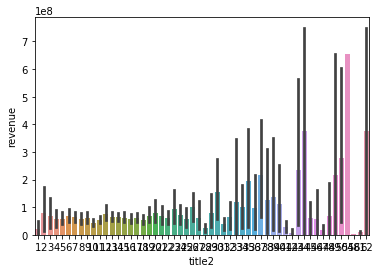

In [293]:
sns.barplot('title2', 'revenue', data=train)

In [296]:
train['Keywords2'] = train.Keywords.apply(lambda x: x.count('id'))

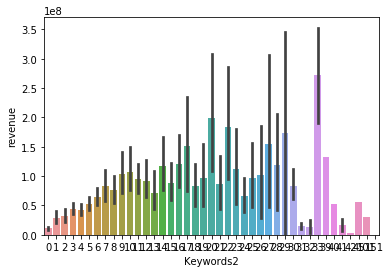

In [299]:
sns.barplot('Keywords2', 'revenue', data=train)

In [302]:
train.cast[0].count('cast_id')

24

In [303]:
train['cast2'] = train.cast.apply(lambda x: x.count('cast_id'))

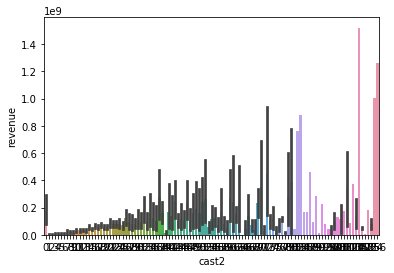

In [306]:
sns.barplot('cast2', 'revenue', data=train)

In [309]:
train['genres2'] = train.genres.apply(lambda x: x.count('id'))

In [312]:
train.genres2.value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres2, dtype: int64

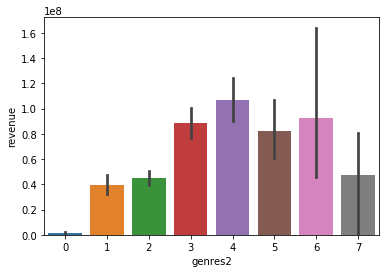

In [313]:
sns.barplot('genres2', 'revenue', data=train)

In [316]:
train.production_countries

0       [{'iso_3166_1': 'US', 'name': 'United States o...
1       [{'iso_3166_1': 'US', 'name': 'United States o...
2       [{'iso_3166_1': 'US', 'name': 'United States o...
3                 [{'iso_3166_1': 'IN', 'name': 'India'}]
4           [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
5                                                  unknow
6       [{'iso_3166_1': 'US', 'name': 'United States o...
7                                                  unknow
8       [{'iso_3166_1': 'US', 'name': 'United States o...
9       [{'iso_3166_1': 'US', 'name': 'United States o...
10      [{'iso_3166_1': 'US', 'name': 'United States o...
11      [{'iso_3166_1': 'US', 'name': 'United States o...
12      [{'iso_3166_1': 'US', 'name': 'United States o...
13      [{'iso_3166_1': 'US', 'name': 'United States o...
14      [{'iso_3166_1': 'US', 'name': 'United States o...
15               [{'iso_3166_1': 'RS', 'name': 'Serbia'}]
16      [{'iso_3166_1': 'US', 'name': 'United States o...
17       [{'is

In [370]:
train['production_countries2'] = train.production_countries.apply(lambda x: x.count('name'))

In [371]:
train.production_countries2.value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries2, dtype: int64

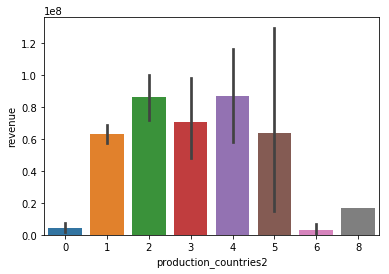

In [372]:
sns.barplot('production_countries2', 'revenue', data=train)

In [322]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'tagline2', 'spoken_languages3', 'spoken_languages2 ',
       'spoken_languages2', 'release_data_year', 'release_data_month',
       'release_data_day', 'release_data_weekday', 'production_countries2',
       'crew2', 'overview2', 'original_title2', 'homepage2',
       'train.belongs_to_collection2', 'belongs_to_collection2',
       'production_companies2', 'original_title3', 'title2', 'Keywords2',
       'cast2', 'genres2', 'production_countries3'],
      dtype='object')

In [327]:
test.isnull().sum()[test.isnull().sum()>0]

release_date    1
status          2
title           3
dtype: int64

In [329]:
test[test.release_date.isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,unknow,0,"[{'id': 18, 'name': 'Drama'}]",unknow,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,unknow,NaN,90.0,unknow,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",unknow,[],unknow


In [330]:
test[test.status.isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,unknow,0,"[{'id': 18, 'name': 'Drama'}]",unknow,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,...,unknow,NaN,90.0,unknow,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",unknow,[],unknow
1056,4057,unknow,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",unknow,tt0334416,en,Stevie,In 1995 Director Steve James (Hoop Dreams) ret...,0.489997,...,unknow,9/9/02,140.0,unknow,NaN,unknow,Stevie,unknow,[],"[{'credit_id': '52fe480dc3a36847f8155e61', 'de..."


In [331]:
test[test.title.isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
2398,5399,unknow,0,"[{'id': 18, 'name': 'Drama'}, {'id': 16, 'name...",http://wwws.warnerbros.co.jp/budori/,tt2391821,ja,グスコーブドリの伝記,Remake of The Life of Guskou Budori (1994).\n ...,0.394173,...,unknow,7/7/12,106.0,unknow,Released,unknow,NaN,unknow,"[{'cast_id': 3, 'character': 'Boduri', 'credit...","[{'credit_id': '52fe4bd7c3a36847f8216183', 'de..."
2425,5426,"[{'id': 115840, 'name': 'Would I Lie to You? C...",25496629,"[{'id': 35, 'name': 'Comedy'}]",http://www.laveritesijemens3.com/,tt1794850,fr,La Vérité si je Mens ! 3,"Eddie, Dov, Yvan et les autres‚Ä¶ Nos chaleure...",3.815840,...,unknow,1/31/12,120.0,unknow,Released,unknow,NaN,unknow,"[{'cast_id': 2, 'character': 'Eddie', 'credit_...","[{'credit_id': '552bb9a09251417c29001c7a', 'de..."
3628,6629,unknow,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://barefootthemovie.com/,tt2355495,en,Barefoot,"The ""black sheep"" son of a wealthy family meet...",5.939334,...,unknow,2/2/14,90.0,unknow,Released,unknow,NaN,"[{'id': 2487, 'name': 'naivety'}, {'id': 9714,...","[{'cast_id': 3, 'character': 'Daisy', 'credit_...","[{'credit_id': '52fe4ec2c3a36847f82a65a7', 'de..."


In [344]:
round(train.release_data_year.mean())

2005.0

In [345]:
round(train.release_data_month.mean())

7.0

In [346]:
round(train.release_data_day.mean())

15.0

In [347]:
round(train.release_data_weekday.mean())

3.0

In [350]:
train.status.mode()

0    Released
dtype: object

In [351]:
train.title = train.title.fillna("unknow")
test.title = test.title.fillna("unknow")

In [352]:
train.status = train.status.fillna(train.status.mode())
test.status = test.status.fillna(train.status.mode())

In [353]:
train.release_date = train.release_date.fillna("unknow")
test.release_date = test.release_date.fillna("unknow")

In [374]:
# Feature Engeering

train['genres2'] = train.genres.apply(lambda x: x.count('id'))
test['genres2'] = test.genres.apply(lambda x: x.count('id'))

train['cast2'] = train.cast.apply(lambda x: x.count('cast_id'))
test['cast2'] = test.cast.apply(lambda x: x.count('cast_id'))

train['Keywords2'] = train.Keywords.apply(lambda x: x.count('id'))
test['Keywords2'] = test.Keywords.apply(lambda x: x.count('id'))

train['title2'] = train.title.apply(lambda x: len(x))
test['title2'] = test.title.apply(lambda x: len(x))

train['tagline2'] = train.tagline.apply(lambda x: len(x))
test['tagline2'] = test.tagline.apply(lambda x: len(x))

train['spoken_languages2'] = train.spoken_languages.apply(lambda x: x.count('name'))
test['spoken_languages2'] = test.spoken_languages.apply(lambda x: x.count('name'))




train['production_countries2'] = train.production_countries.apply(lambda x: x.count('name'))
test['production_countries2'] = test.production_countries.apply(lambda x: x.count('name'))

train['crew2'] = train.crew.apply(lambda x: x.count('id'))
test['crew2'] = test.crew.apply(lambda x: x.count('id'))

train['overview2'] = train.overview.apply(lambda x: len(x))
test['overview2'] = test.overview.apply(lambda x: len(x))

train['original_title2'] = train.original_title.apply(lambda x: len(x))
test['original_title2'] = test.original_title.apply(lambda x: len(x))

train['homepage2'] = train.homepage.apply(lambda x: 0 if x=='unknow' else 1)
test['homepage2'] = test.homepage.apply(lambda x: 0 if x=='unknow' else 1)

train['belongs_to_collection2'] = train.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)
test['belongs_to_collection2'] = test.belongs_to_collection.apply(lambda x: 0 if x=='unknow' else 1)

train['production_companies2'] = train.production_companies.apply(lambda x: x.count('id'))
test['production_companies2'] = test.production_companies.apply(lambda x: x.count('id'))

In [382]:
test.release_date[test.release_date=="unknow"] = 0000-00-00

In [383]:
train['release_date_year'] = train.release_date.apply(lambda x: pd.to_datetime(x).year)
train['release_date_month'] = train.release_date.apply(lambda x: pd.to_datetime(x).month)
train['release_date_day'] = train.release_date.apply(lambda x: pd.to_datetime(x).day)
train['release_date_weekday'] = train.release_date.apply(lambda x: pd.to_datetime(x).weekday())
test['release_date_year'] = test.release_date.apply(lambda x: pd.to_datetime(x).year)
test['release_date_month'] = test.release_date.apply(lambda x: pd.to_datetime(x).month)
test['release_date_day'] = test.release_date.apply(lambda x: pd.to_datetime(x).day)
test['release_date_weekday'] = test.release_date.apply(lambda x: pd.to_datetime(x).weekday())

In [384]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'tagline2', 'spoken_languages3', 'spoken_languages2 ',
       'spoken_languages2', 'release_data_year', 'release_data_month',
       'release_data_day', 'release_data_weekday', 'production_countries2',
       'crew2', 'overview2', 'original_title2', 'homepage2',
       'train.belongs_to_collection2', 'belongs_to_collection2',
       'production_companies2', 'original_title3', 'title2', 'Keywords2',
       'cast2', 'genres2', 'production_countries3', 'release_date_year',
       'release_date_month', 'release_date_day', 'release_date_weekday'],
      dtype='object')

In [386]:
train.drop(['spoken_languages3', 'spoken_languages2 ', 'release_data_year', 'release_data_month',
       'release_data_day', 'release_data_weekday',  'train.belongs_to_collection2', 'original_title3', 'production_countries3'], axis=1, inplace=True)

In [387]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'tagline2', 'spoken_languages2', 'production_countries2', 'crew2',
       'overview2', 'original_title2', 'homepage2', 'belongs_to_collection2',
       'production_companies2', 'title2', 'Keywords2', 'cast2', 'genres2',
       'release_date_year', 'release_date_month', 'release_date_day',
       'release_date_weekday'],
      dtype='object')

In [388]:
test.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'genres2',
       'cast2', 'Keywords2', 'title2', 'tagline2', 'spoken_languages2',
       'production_countries2', 'crew2', 'overview2', 'original_title2',
       'homepage2', 'belongs_to_collection2', 'production_companies2',
       'release_date_year', 'release_date_month', 'release_date_day',
       'release_date_weekday'],
      dtype='object')

In [391]:
train2 = train.copy()
test2 = test.copy()

In [393]:
train.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)

In [395]:
test.drop(['id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'spoken_languages' , 'tagline', 'title', 'Keywords', 'cast', 'crew'], axis=1, inplace=True)

In [396]:
train.shape

(3000, 22)

In [397]:
test.shape

(4398, 21)

In [398]:
tmdb = pd.concat([train, test], sort=False)

In [400]:
tmdb.shape

(7398, 22)

In [401]:
tmdb = pd.get_dummies(tmdb)

In [403]:
tmdb.head()

,budget,popularity,runtime,revenue,tagline2,spoken_languages2,production_countries2,crew2,overview2,original_title2,...,Keywords2,cast2,genres2,release_date_year,release_date_month,release_date_day,release_date_weekday,status_Post Production,status_Released,status_Rumored
0,14000000,6.575393,93.0,12314651.0,52,1,1,144,155,22,...,4,24,1,2015,2,20,4,0,1,0
1,40000000,8.248895,113.0,95149435.0,60,1,1,18,393,40,...,4,20,4,2004,8,6,4,0,1,0
2,3300000,64.299990,105.0,13092000.0,47,1,1,132,130,8,...,12,51,1,2014,10,10,4,0,1,0
3,1200000,3.174936,122.0,16000000.0,6,2,1,6,581,7,...,7,7,2,2012,3,9,4,0,1,0
4,0,1.148070,118.0,3923970.0,6,1,1,4,168,4,...,0,4,2,2009,2,5,3,0,1,0


In [407]:
len_train = len(train)
len_test = len(test)

In [408]:
train = tmdb[:len_train]
test = tmdb[len_train:]

In [413]:
train.revenue.dtype

dtype('float64')

In [415]:
train.revenue = train.revenue.astype('int')

In [416]:
train.revenue.dtype

dtype('int32')

In [418]:
xtrain=train.drop("revenue", axis=1)
ytrain=train['revenue']
xtest=test.drop("revenue", axis=1)

In [419]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [420]:
RF=RandomForestClassifier(random_state=1)
PRF=[{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,xtrain,ytrain,scoring='accuracy',cv=5)

d:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
d:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
d:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
d:\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of 

In [421]:
np.mean(scores_rf)

0.12363862377073284

In [424]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log

In [428]:
train_X, val_X, train_y, val_y = train_test_split(xtrain, ytrain, random_state=1)
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [429]:
val_preds = my_model.predict(val_X)

In [436]:
rmsle = mean_squared_error(np.log(abs(val_preds)), np.log(val_y))

In [437]:
print("RMSLE: %2f" %sqrt(rmsle))

RMSLE: 2.570050


In [449]:
val_preds2 = val_preds.copy()

In [496]:
val_preds[val_preds<0] = 0

In [497]:
val_preds

array([1.49355008e+08, 2.18622760e+07, 9.83258496e+08, 8.67966960e+07,
       7.95723120e+07, 1.38239088e+08, 2.08267140e+07, 3.27921700e+07,
       1.14914880e+08, 6.97339200e+06, 1.17761520e+08, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.80930960e+07, 0.00000000e+00,
       6.50690350e+06, 6.71518800e+06, 2.36820840e+07, 1.34348612e+06,
       0.00000000e+00, 8.53885440e+07, 8.67304000e+06, 0.00000000e+00,
       4.11246800e+07, 1.25542650e+06, 1.68768272e+08, 7.80840160e+07,
       8.93471562e+05, 3.32419075e+06, 2.48930600e+06, 6.53028992e+08,
       9.52534000e+06, 5.35641320e+07, 1.01471056e+08, 7.91720100e+06,
       1.89031720e+07, 7.64626880e+07, 3.96993320e+07, 6.87120400e+07,
       3.08369650e+06, 1.14099120e+07, 2.49285860e+07, 0.00000000e+00,
       3.32180220e+07, 0.00000000e+00, 0.00000000e+00, 4.03708840e+07,
       5.77404600e+07, 1.55907760e+07, 4.89528520e+07, 2.95213792e+08,
       1.27264880e+08, 1.03207260e+07, 5.75708120e+07, 9.36070960e+07,
      

In [498]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( val_preds, val_y))

5.478843847722461

In [458]:
val_preds2

array([1.49355008e+08, 2.18622760e+07, 9.83258496e+08, 8.67966960e+07,
       7.95723120e+07, 1.38239088e+08, 2.08267140e+07, 3.27921700e+07,
       1.14914880e+08, 6.97339200e+06, 1.17761520e+08, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.80930960e+07, 0.00000000e+00,
       6.50690350e+06, 6.71518800e+06, 2.36820840e+07, 1.34348612e+06,
       0.00000000e+00, 8.53885440e+07, 8.67304000e+06, 0.00000000e+00,
       4.11246800e+07, 1.25542650e+06, 1.68768272e+08, 7.80840160e+07,
       8.93471562e+05, 3.32419075e+06, 2.48930600e+06, 6.53028992e+08,
       9.52534000e+06, 5.35641320e+07, 1.01471056e+08, 7.91720100e+06,
       1.89031720e+07, 7.64626880e+07, 3.96993320e+07, 6.87120400e+07,
       3.08369650e+06, 1.14099120e+07, 2.49285860e+07, 0.00000000e+00,
       3.32180220e+07, 0.00000000e+00, 0.00000000e+00, 4.03708840e+07,
       5.77404600e+07, 1.55907760e+07, 4.89528520e+07, 2.95213792e+08,
       1.27264880e+08, 1.03207260e+07, 5.75708120e+07, 9.36070960e+07,
      

In [462]:
rmsle = mean_squared_error(np.log(abs(val_preds2)), np.log(val_y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [466]:
pred = my_model.predict(xtest)

In [468]:
test2

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew2,overview2,original_title2,homepage2,belongs_to_collection2,production_companies2,release_date_year,release_date_month,release_date_day,release_date_weekday
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,5,335,18,1,1,0,2007,7,14,5
1,3002,unknow,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",unknow,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,16,162,27,0,0,1,2058,5,19,6
2,3003,unknow,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",unknow,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,20,362,16,0,0,3,1997,5,23,4
3,3004,unknow,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,139,302,9,1,0,3,2010,9,4,5
4,3005,unknow,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",unknow,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,30,894,18,0,0,0,2005,2,11,4
5,3006,unknow,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",unknow,tt0120238,en,SubUrbia,A group of suburban teenagers try to support e...,8.679350,...,6,102,8,0,0,2,1996,2,7,2
6,3007,unknow,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",unknow,tt1517177,de,Drei,Hanna and Simon are in a 20 year marriage with...,4.898882,...,4,300,4,0,0,4,2010,12,23,3
7,3008,unknow,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.tigger.com,tt0220099,en,The Tigger Movie,"As it happens, everybody - Pooh, Piglet, Eeyor...",7.023414,...,60,355,16,1,0,1,2000,2,11,4
8,3009,unknow,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://becomingjane-themovie.com/,tt0416508,en,Becoming Jane,A biographical portrait of a pre-fame Jane Aus...,7.829737,...,30,88,13,1,0,3,2007,3,2,4
9,3010,"[{'id': 10194, 'name': 'Toy Story Collection',...",90000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story-2,tt0120363,en,Toy Story 2,"Andy heads off to Cowboy Camp, leaving his toy...",17.547693,...,352,322,11,1,1,1,1999,10,30,5


In [479]:
output = pd.DataFrame({'id': test2.id, 'revenue': pred})

In [486]:
output[output.revenue<0]['revenue'] = 0

In [492]:
output.to_csv('submission1.csv', index=False)

In [490]:
output.revenue[output.revenue<0] = 0

In [491]:
output

,id,revenue
0,3001,1.074489e+07
1,3002,0.000000e+00
2,3003,1.569614e+07
3,3004,5.261102e+07
4,3005,0.000000e+00
5,3006,1.289551e+07
6,3007,1.712760e+07
7,3008,5.459224e+07
8,3009,2.926189e+07
9,3010,3.435668e+08
